# Guessing game simulation

###### Scott Cole

Read the accompanying blog post at http://sxcole.com/blog/

These simulations concern the following guessing game from a recent Numberphile episode (below):

1. 2 random numbers are generated (A and B)
2. 1 is randomly chosen (A)
3. A random number (K) is generated by some sort of distribution
4. A guess is made with the following rule:
    * If K > A, guess that B > A.
    * If K < A, guess that B < A.

In the episode, Alex Bellos describes how generating a random number and using this strategy biases the guesser to perform at above 50% accuracy.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ud_frfkt1t0")

In [2]:
# Import libraries
from __future__ import division
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# Initialize random seed
np.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def genABK(nTrials,int_min,int_max):
    '''
    Generate the random numbers for the simulation with a uniform distribution
    between 2 integers
    
    Parameters
    ----------
    nTrials : int
        Number of trials in the game
    int_min : int
        Minimum integer to be generated
    int_max : int
        Maximum integer to be generated
        
    Returns
    -------
    A, B, K : array-like (nTrials x 1)
        Randomly generated integers for each of the three numbers in the game
    '''
    A = np.random.randint(int_min,int_max+1,nTrials)
    B = np.random.randint(int_min,int_max+1,nTrials)
    K = np.random.randint(int_min,int_max+1,nTrials)

    # Generate a new random number for B and K if it is the same as A
    for t in range(nTrials):
        while B[t] == A[t]:
            B[t] = np.random.randint(int_min,int_max+1)
        while K[t] == A[t]:
            K[t] = np.random.randint(int_min,int_max+1)
            
    return A, B, K

### Simulation 1: Guessing significantly above chance in 100 trials

Does a guesser perform significantly above chance (as Alex proposes at the end of his video) in a game with the following parameters:
* A and B are integers between 10 and 50
* 100 trials

In [4]:
# Set simulation parameters
nTrials = 100
int_min = 10
int_max = 50
int_range = int_max - int_min + 1

# Perform guessing game
trialsWon = 0
A, B, K = genABK(nTrials, int_min, int_max)

for t in range(nTrials):
    res = np.logical_xor(A[t]>K[t],A[t]<B[t])
    trialsWon += res
    
fracWon = trialsWon / nTrials

# Statistics: binomial distribution
cum_p = binom.cdf(trialsWon,nTrials,0.5)
print 'p =' , 1 - cum_p

p = 1.60800076479e-05


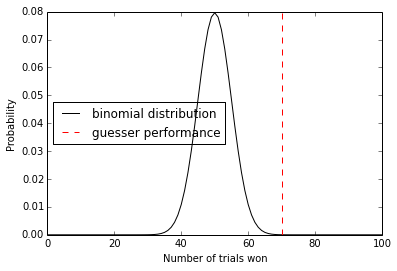

In [5]:
# Visualize performance relative to the binomial distribution
binom_pmf = binom.pmf(range(nTrials+1),nTrials,0.5)
plt.figure()
plt.plot(range(nTrials+1),binom_pmf,'k-',label='binomial distribution')
plt.plot([trialsWon,trialsWon],[0,np.max(binom_pmf)],'r--',label='guesser performance')
plt.xlabel('Number of trials won')
plt.ylabel('Probability')
plt.legend(loc='best')

### Simulation 2: Choosing K is better than randomly generating K

Does an informed choice of K result in better performance than a randomly generated K?

In [6]:
nTrials = 10000
A, B, K = genABK(nTrials, int_min, int_max)
Ks = range(int_min,int_max+1)
trialsWon_k = np.zeros((int_range,1))
trialsWon_rand = 0

for t in range(nTrials):
    res = np.logical_xor(A[t]>K[t],A[t]<B[t])
    trialsWon_rand += res
    
    for k in range(int_range):
        # Note: If flipped over card equals that number, then count it as being lower
        res = np.logical_xor(A[t]>Ks[k],A[t]<B[t])
        trialsWon_k[k] += res
        
fracWon_k = trialsWon_k / nTrials
fracWon_rand = trialsWon_rand / nTrials

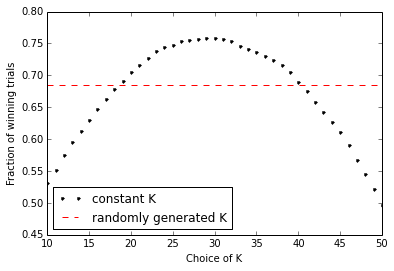

In [7]:
# Visualize results
plt.figure()
plt.plot(Ks, fracWon_k, 'k.',label='constant K')
plt.plot([int_min,int_max],[fracWon_rand,fracWon_rand],'r--', label='randomly generated K')
plt.xlabel('Choice of K')
plt.ylabel('Fraction of winning trials')
plt.legend(loc='best')

### Simulation 3: Median estimation is better than random number generation from known distribution

Does Player 2 perform better if:
1. It has knowledge of the distribution and generates K from randomly sampling from this distribution, or
2. It has <b>no</b> knowledge of the distribution and generates K by estimating the median over trials


In [8]:
# Self-generated 100 random numbers
randHuman100 = [7, 66, 5.5, 444, 10, -1000, 0, 0.1, 0.2, 33, -33, -5, -12, 6,
             1.2, 333, 42, -44, 5.213, 44.44, 30.3, 829.3, 1, 1.44, 99, -9,
             0.001, 3.4, -2.5, 9.3, -33, -6, -0.9, 111, -473, 2, 93, 85,
             67.32, 7, -5, -1.8, 9.343, 15.2, 5.4, -3.777, 99.2, 100, 0.39,
             65, 22, -49, 38, 1.33,4.01,17,55,0.3,-283,-893,-777,910,762,482,
             109,192,75,988,762,983,492,-291,-432,-753,77,-37,8.3,0.36,-94,
             6,28,-46,-389,-0.3,48,222,8.38,-95,-63,-154,83,94.6,193.5,882,
             -3,-82,9.4,33,555,82]

In [9]:
# Expand self-generated 100 random numbers to 25600 (for >10,000 trials)
randHuman = np.hstack((randHuman100,[x * 1.5 for x in randHuman100]))
randHuman = np.hstack((randHuman,[x / 2 for x in randHuman]))
randHuman = np.hstack((randHuman,[x * 2.5 for x in randHuman]))
randHuman = np.hstack((randHuman,[x / 3 for x in randHuman]))
randHuman = np.hstack((randHuman,[x * 3.5 for x in randHuman]))
randHuman = np.hstack((randHuman,[x / 4 for x in randHuman]))
randHuman = np.hstack((randHuman,[x * 4.5 for x in randHuman]))
randHuman = np.hstack((randHuman,[x / 5 for x in randHuman]))

nHuman = len(randHuman)

In [10]:
# Generate A and B
nTrials = np.int(np.floor(nHuman / 2))
A = np.random.permutation(randHuman)
B = A[nTrials:]
A = A[:nTrials]

In [11]:
# Generate Ks for both strategies
K_dist_idx = np.random.randint(0,nHuman,nTrials)
K_dist = np.zeros((nTrials,1))
K_median = np.zeros((nTrials,1))
for t in range(nTrials):
    
    if t == 0:
        K_median[t] = 0
    else:
        cum_numbers = np.hstack((A[:t].tolist(),B[:t].tolist()))
        K_median[t] = np.median(cum_numbers)
        
    K_dist[t] = randHuman[K_dist_idx[t]]

In [12]:
# Simulation
trialRes_dist = np.zeros((nTrials,1))
trialRes_median = np.zeros((nTrials,1))
for t in range(nTrials):
    trialRes_dist[t] = np.logical_xor(A[t]>K_dist[t],A[t]<B[t])[0]
    trialRes_median[t] = np.logical_xor(A[t]>K_median[t],A[t]<B[t])[0]

# Simulation results
trialsWon_dist = np.sum(trialRes_dist)
trialsWon_median = np.sum(trialRes_median)
fracWon_dist = trialsWon_dist / nTrials
fracWon_median = trialsWon_median / nTrials

print 'Fraction of trials won:'
print 'K = random sample from distribution:', round(fracWon_dist,3)
print 'K = cumulative median:', round(fracWon_median,3)

Fraction of trials won:
K = random sample from distribution: 0.665
K = cumulative median: 0.748


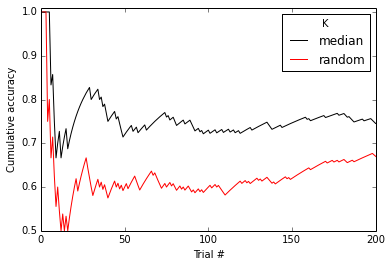

In [13]:
# Cumulative accuracy over trials
cum_accuracy_dist = np.cumsum(trialRes_dist)
cum_accuracy_dist = cum_accuracy_dist / np.arange(1,nTrials+1)
cum_accuracy_median = np.cumsum(trialRes_median)
cum_accuracy_median = cum_accuracy_median / np.arange(1,nTrials+1)

plt.figure()
plt.plot(np.arange(1,nTrials+1),cum_accuracy_median,'k-',label='median')
plt.plot(np.arange(1,nTrials+1),cum_accuracy_dist,'r-',label='random')
plt.xlabel('Trial #')
plt.ylabel('Cumulative accuracy')
plt.ylim([0.5,1.01])
plt.xlim([0,200])
plt.legend(loc='best',title='K')

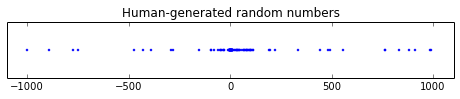

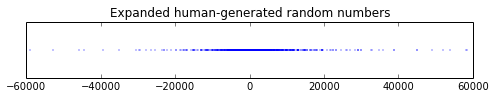

In [14]:
# Visualize my random number distribution
plt.figure(figsize=(8,1))
plt.plot(randHuman100,np.zeros((100,1)),'.',ms=4)
plt.xlim([-1100,1100])
plt.yticks([])
plt.title('Human-generated random numbers')

plt.figure(figsize=(8,1))
plt.plot(randHuman,np.zeros((nHuman,1)),'.',ms=1)
plt.xlim([-60000,60000])
plt.yticks([])
plt.title('Expanded human-generated random numbers')

### Simulation 4: A and B are not independent

In [15]:
# Generate new samples for B
AminusB = np.random.randint(0,2,nTrials)
AminusB[AminusB==0] = -1
B = A - AminusB

In [16]:
# Simulation
trialRes_dist = np.zeros((nTrials,1))
trialRes_median = np.zeros((nTrials,1))
for t in range(nTrials):
    trialRes_dist[t] = np.logical_xor(A[t]>K_dist[t],A[t]<B[t])[0]
    trialRes_median[t] = np.logical_xor(A[t]>K_median[t],A[t]<B[t])[0]

# Simulation results
trialsWon_dist = np.sum(trialRes_dist)
trialsWon_median = np.sum(trialRes_median)
fracWon_dist = trialsWon_dist / nTrials
fracWon_median = trialsWon_median / nTrials

print 'Fraction of trials won:'
print 'K = random sample from distribution:', round(fracWon_dist,3), 'p =', 1 - binom.cdf(trialsWon_dist,nTrials,0.5)
print 'K = cumulative median:', round(fracWon_median,3), 'p =', 1 - binom.cdf(trialsWon_median,nTrials,0.5)

Fraction of trials won:
K = random sample from distribution: 0.501 p = 0.385265723927
K = cumulative median: 0.505 p = 0.11296225937
